In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [11]:
row_data=pd.read_csv('1.03.+Dummies.csv')
row_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [12]:
df=row_data.copy()

In [13]:
df['Attendance']=df['Attendance'].map({'Yes':1,'No':0})
df

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [14]:
df.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [15]:
y=df['GPA']
x1=df[['SAT','Attendance']]

x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           2.19e-15
Time:                        20:27:56   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

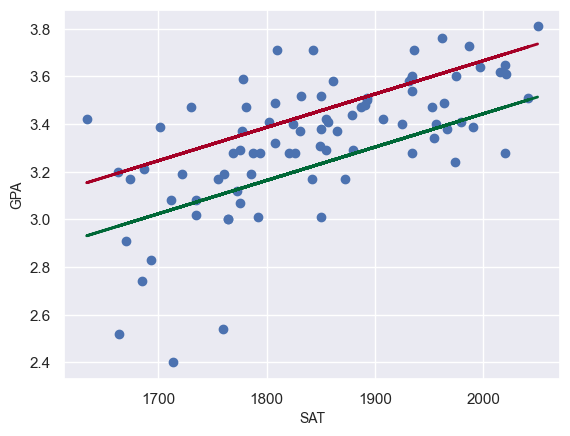

In [16]:
plt.scatter(df['SAT'],y)
yhat_no=0.6439+0.0014*df['SAT']+0.2226*0
yhat_yes=0.6439+0.0014*df['SAT']+0.2226*1
plt.plot(df['SAT'],yhat_no, lw=2, c='#006837')
plt.plot(df['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GPA', fontsize = 10)
plt.show()

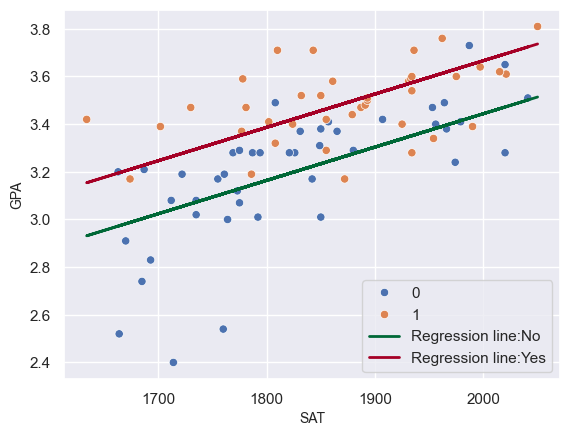

In [24]:
sns.scatterplot(x='SAT',y='GPA',hue='Attendance',data=df)
yhat_no=0.6439+0.0014*df['SAT']+0.2226*0
yhat_yes=0.6439+0.0014*df['SAT']+0.2226*1
plt.plot(df['SAT'],yhat_no, lw=2, c='#006837',label='Regression line:No')
plt.plot(df['SAT'],yhat_yes, lw=2, c='#a50026',label='Regression line:Yes')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GPA', fontsize = 10)
plt.legend()
plt.show()


In [18]:
b0=0.141*(1+0.75)
b0

0.24674999999999997

In [19]:
b1=0.001*(1+0.75)
b1

0.00175

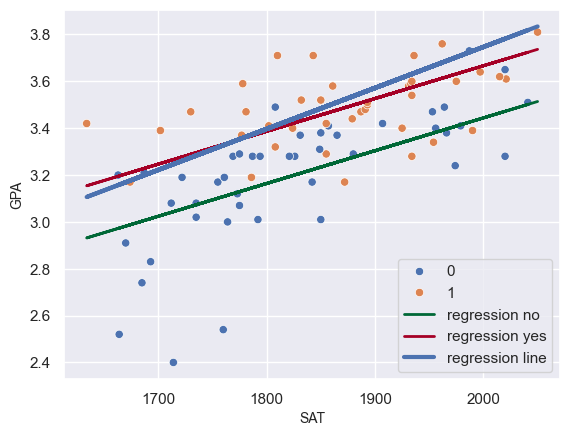

In [23]:
sns.scatterplot(x='SAT',y='GPA',hue='Attendance',data=df)
yhat_no=0.6439+0.0014*df['SAT']+0.2226*0
yhat_yes=0.6439+0.0014*df['SAT']+0.2226*1
yhat=b0+b1*df['SAT']
plt.plot(df['SAT'],yhat_no, lw=2, c='#006837',label ='regression no')
plt.plot(df['SAT'],yhat_yes, lw=2, c='#a50026',label ='regression yes')
fig = plt.plot(df['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GPA', fontsize = 10)
plt.legend()
plt.show()


In [25]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [26]:
new_data=pd.DataFrame({'const':1,'SAT':[1700,1600],'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1600,1


In [29]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1600,1


In [31]:
new_data=new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1600,1


In [33]:
prediction=result.predict(new_data)
prediction

0    3.023513
1    3.106177
dtype: float64

In [35]:
predictiondf=pd.DataFrame({'Prediction':prediction})
join_=new_data.join(predictiondf)
join_

,const,SAT,Attendance,Prediction
0,1,1700,0,3.023513
1,1,1600,1,3.106177
